<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/LAttteeeessstt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler #data preprocessing
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
# filter warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
%matplotlib inline


In [4]:
name = ['Class','age', 'sex','haemoglobin','platelets','WBC', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']

In [5]:
data = pd.read_csv('burn_survival.data', names = name)
temp_data = data.copy();

# **Data Preprocessing**

In [6]:

le = LabelEncoder()
le.fit(data['Class'])
le.classes_
data['Class'] = le.transform(data['Class'])

le.fit(data['sex'])
le.classes_
data['sex'] = le.transform(data['sex'])

# **Feature Scaling**

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [8]:
X = data[['age', 'sex','haemoglobin','platelets','WBC', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']]
y = data['Class']

In [9]:
#  Spliting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=50)
X_test, X_val, y_test, y_val  = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

In [10]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("x val: ",X_val.shape)

print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (62, 10)
x test:  (21, 10)
x val:  (21, 10)
y train:  (62,)
y test:  (21,)
y val:  (21,)


# **LOGISTIC REGRESSION**

In [11]:
# Defining logistic regression
survival_classifier = LogisticRegression(C=0.01)

In [12]:
survival_classifier.fit(X_train, y_train)
y_pred = survival_classifier.predict(X_test)
y_pred_val = survival_classifier.predict(X_val)

In [13]:
#evaluating the model
print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.82      1.00      0.90        14

    accuracy                           0.86        21
   macro avg       0.91      0.79      0.82        21
weighted avg       0.88      0.86      0.84        21

Test Accuracy:  0.8571428571428571


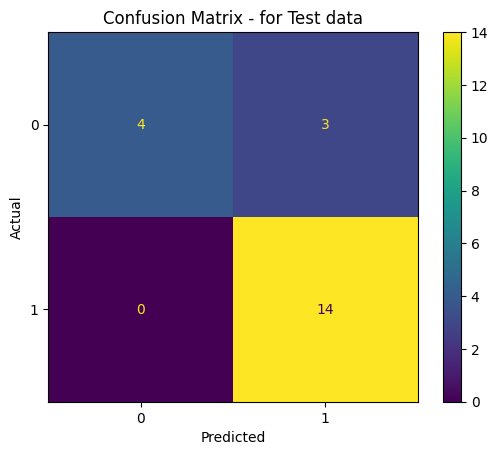

In [14]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

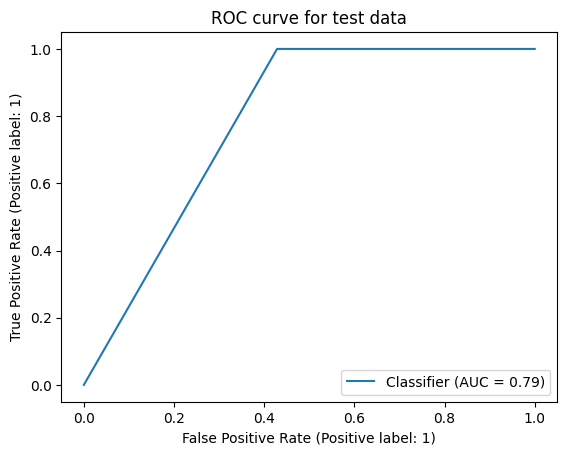

In [15]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve for test data')
plt.show()

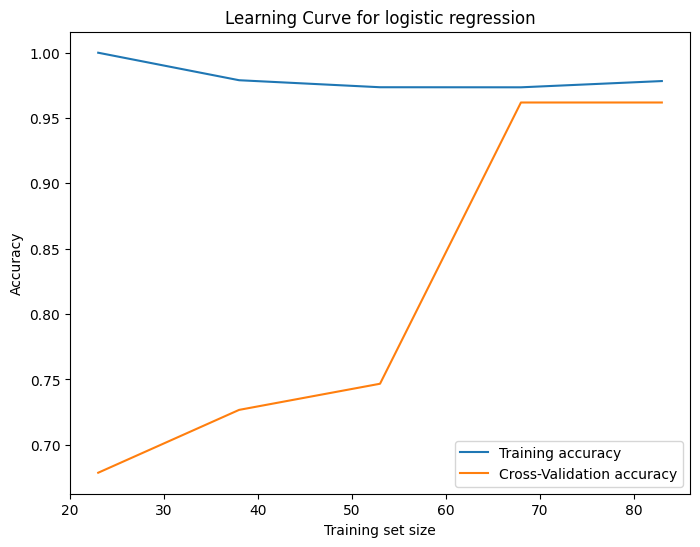

In [16]:
train_sizes, train_scores, test_scores = learning_curve(survival_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 6))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for logistic regression')
plt.legend(loc='best')
plt.show()

In [17]:
# Tuning parameters parameters
parameters = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

In [18]:
logreg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(logreg, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [19]:
#  Display the best parameters and their corresponding accuracy
best_params_lg = grid_search.best_params_
print("Best Parameters:", best_params_lg)


Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [20]:
# Evaluate the model on the test set using the best parameters
best_logreg = LogisticRegression(solver='liblinear', **best_params_lg)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

In [21]:
# Accuracy for test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.97        14

    accuracy                           0.95        21
   macro avg       0.97      0.93      0.94        21
weighted avg       0.96      0.95      0.95        21



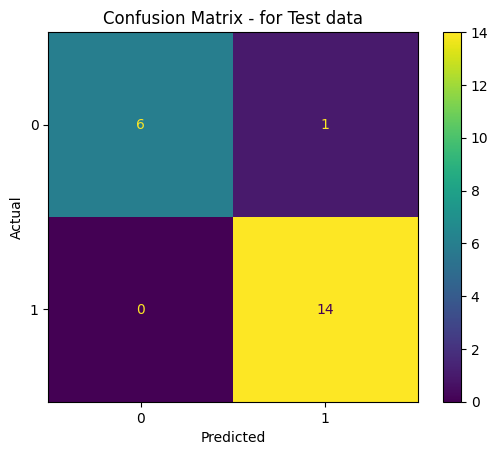

In [22]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

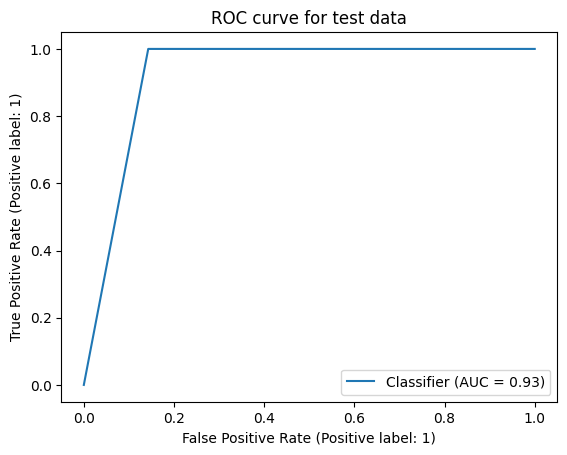

In [23]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve for test data')
plt.show()

<Axes: xlabel='serum-globulin', ylabel='serum-albumin'>

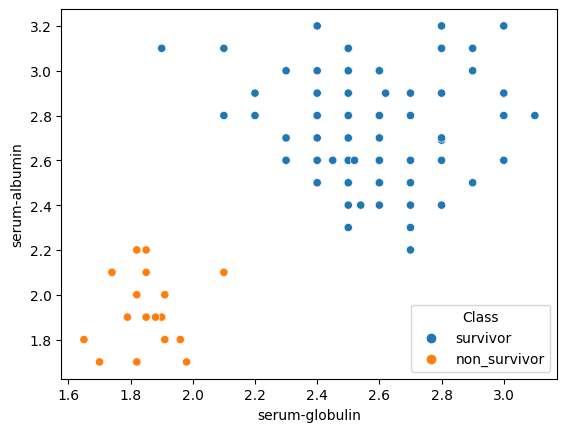

In [24]:
sns.scatterplot(data=temp_data, x='serum-globulin', y='serum-albumin', hue='Class')

## Above plot shows us the clear seperation between two class,
lets try using feature selection (Selecting  serum=albumin and serum-globulin features)



In [133]:
X = data[['serum-albumin','serum-globulin']]
y = data['Class']

In [134]:
#  Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=50)
X_test, X_val, y_test, y_val  = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

In [136]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
grid_search = GridSearchCV(logreg, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [137]:
#  Display the best parameters and their corresponding accuracy
best_params_lg = grid_search.best_params_
print("Best Parameters:", best_params_lg)

Best Parameters: {'C': 10, 'penalty': 'l1'}


In [138]:
# Evaluate the model on the test set using the best parameters
best_logreg = LogisticRegression(solver='liblinear', **best_params_lg)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



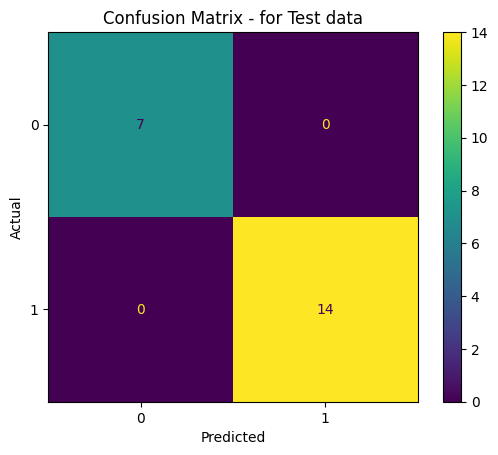

In [140]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

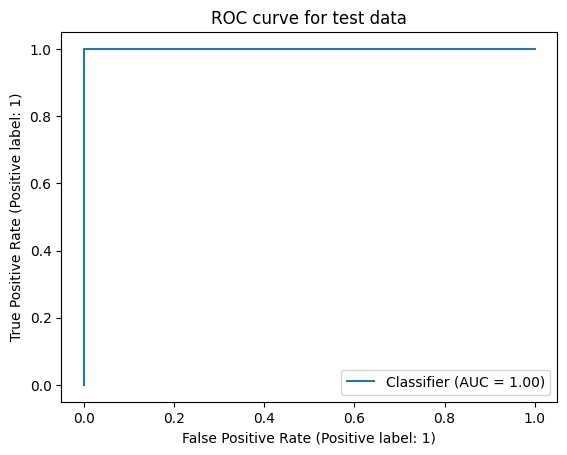

In [141]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve for test data')
plt.show()

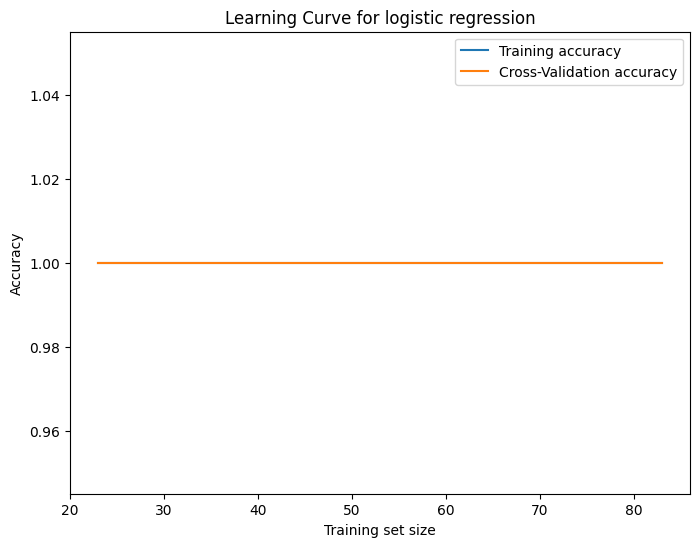

In [142]:
train_sizes, train_scores, test_scores = learning_curve(best_logreg, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 6))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for logistic regression')
plt.legend(loc='best')
plt.show()

# **Classification using SVM**

In [143]:
# Define the Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
pred_y = svm_classifier.predict(X_test)
pred_y_val = svm_classifier.predict(X_val)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [144]:
print('Test Accuracy ',accuracy_score(y_test, pred_y))

Test Accuracy  1.0


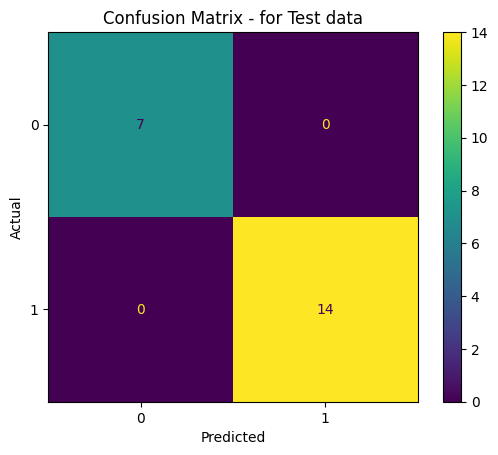

In [160]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,pred_y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

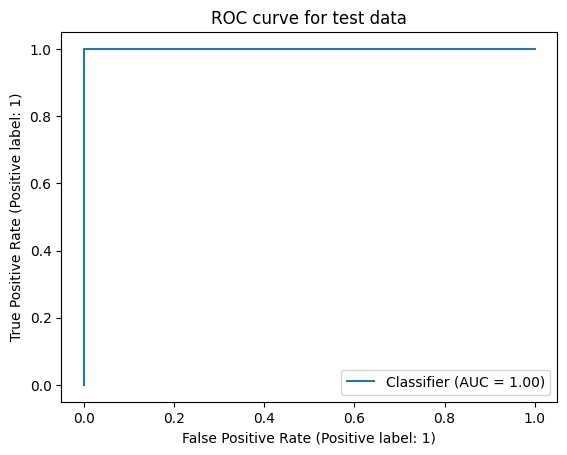

In [146]:
RocCurveDisplay.from_predictions(y_test, pred_y)
plt.title('ROC curve for test data')
plt.show()

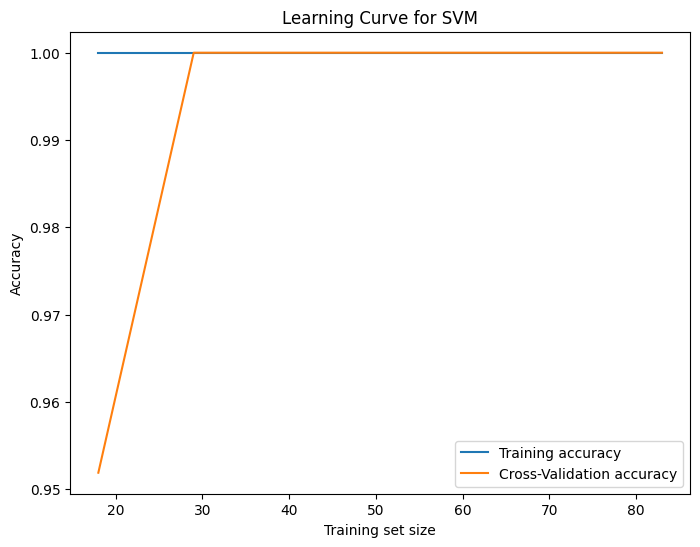

In [147]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 8))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend(loc='best')
plt.show()

Already we have 100% accuracy , still trying to fing best parameters for the model

In [148]:
# Define hyperparameter grid to search
param_grid = {
   'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Display the best parameters and their corresponding accuracy
best_params_svm = grid_search.best_params_
print("Best Parameters:", best_params_svm)

Best Parameters: {'C': 1}


In [149]:
# Evaluate the model on the test set
best_svm_classifier = SVC(**best_params_svm)
best_svm_classifier.fit(X_train, y_train)
y_test_pred = best_svm_classifier.predict(X_test)

In [150]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", accuracy_test)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Accuracy on Test Set: 1.0
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



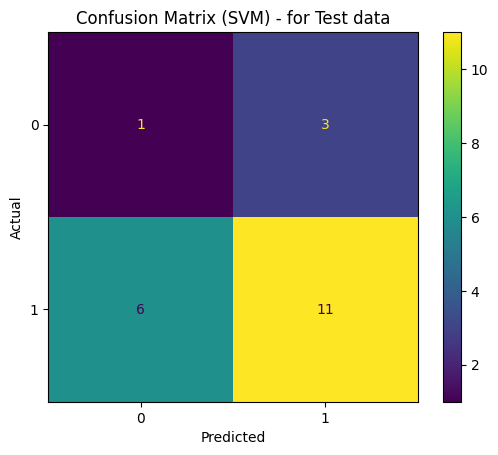

In [151]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val,y_test_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM) - for Test data')
plt.show()

# **Classification using Neural Network**

In [152]:
# Define the Neural Network classifier
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train, y_train)
y_test_pred_nn_clf = nn_classifier.predict(X_test)

In [153]:
print(classification_report(y_test, y_test_pred_nn_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      1.00      0.80        14

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



In [154]:
print('test acuracy',accuracy_score(y_test, y_test_pred_nn_clf))

test acuracy 0.6666666666666666


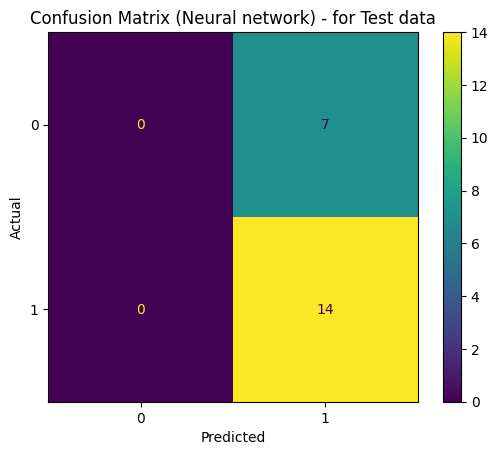

In [155]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_nn_clf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural network) - for Test data')
plt.show()

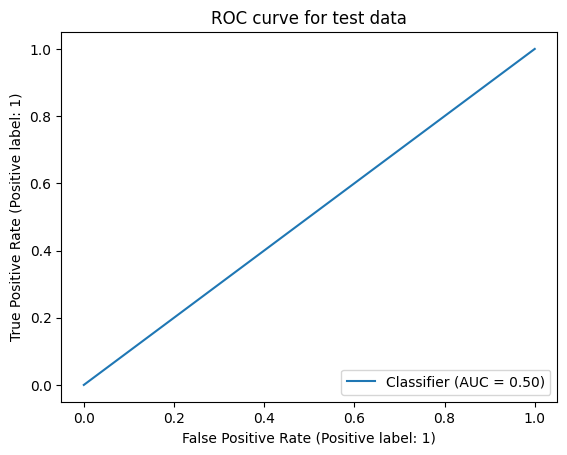

In [158]:
RocCurveDisplay.from_predictions(y_test, y_test_pred_nn_clf)
plt.title('ROC curve for test data')
plt.show()

In [164]:
#Tunign the model
# hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(10,20,10),(20,15,10),(10,10,10)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

In [165]:
#GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(nn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# best parameters and their corresponding accuracy
best_params_nn = grid_search.best_params_
print("Best Parameters:", best_params_nn)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [166]:
# Evaluate the model on the test set
best_nn_classifier = MLPClassifier(**best_params_nn)
best_nn_classifier.fit(X_train, y_train)



MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10))

In [167]:
# Evaluate the model on the test set
y_test_pred = best_nn_classifier.predict(X_test)

# Print results on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", accuracy_test)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Accuracy on Test Set: 1.0
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



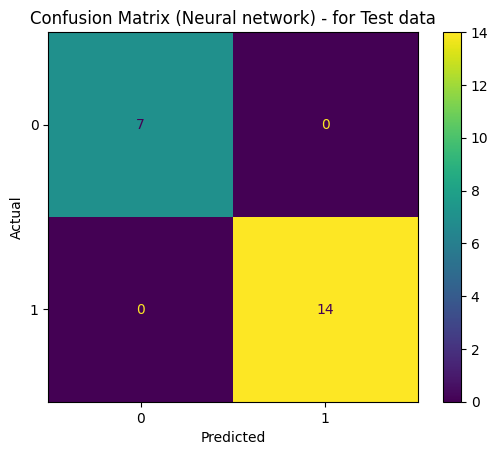

In [168]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural network) - for Test data')
plt.show()

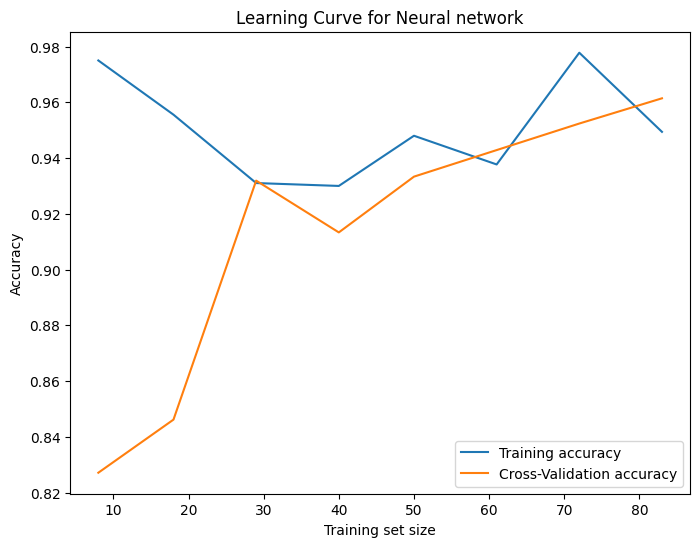

In [169]:
train_sizes, train_scores, test_scores = learning_curve(best_nn_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 8))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Neural network')
plt.legend(loc='best')
plt.show()

# **ROC Curve comparision**

The best params form grid search are considered here

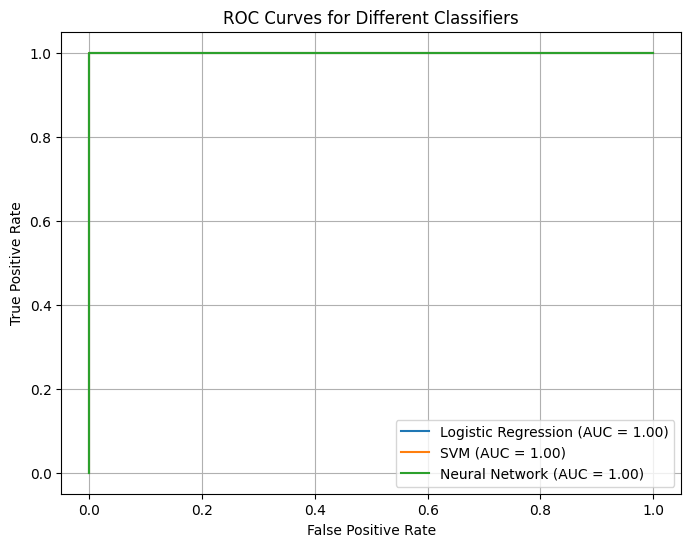

In [170]:
# Train classifiers
classifiers = {
    'Logistic Regression': best_logreg,
    'SVM':best_svm_classifier,
    'Neural Network': best_nn_classifier
}

plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    y_prob = clf.predict(X_test)

    # Compute ROC curve and area under the curve (AUC) for test data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()